In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## EDA(Exploratory data analysis)

In [2]:
import pandas as pd
df1 = pd.read_csv("../input/titanic/train.csv")
df2 = pd.read_csv ("../input/titanic/test.csv")
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train_df = df1[['Sex','Age','Fare','Pclass','Survived']]
train_df.describe()

,Age,Fare,Pclass,Survived
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,32.204208,2.308642,0.383838
std,14.526497,49.693429,0.836071,0.486592
min,0.420000,0.000000,1.000000,0.000000
25%,20.125000,7.910400,2.000000,0.000000
50%,28.000000,14.454200,3.000000,0.000000
75%,38.000000,31.000000,3.000000,1.000000
max,80.000000,512.329200,3.000000,1.000000


In [5]:
train_df = df1[['Sex','Age','Fare','Pclass','Survived']]
train_df.describe()

,Age,Fare,Pclass,Survived
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,32.204208,2.308642,0.383838
std,14.526497,49.693429,0.836071,0.486592
min,0.420000,0.000000,1.000000,0.000000
25%,20.125000,7.910400,2.000000,0.000000
50%,28.000000,14.454200,3.000000,0.000000
75%,38.000000,31.000000,3.000000,1.000000
max,80.000000,512.329200,3.000000,1.000000


In [6]:
test_df = df2[['Sex','Age','Fare','Pclass']]
test_df.describe()


,Age,Fare,Pclass
count,332.000000,417.000000,418.000000
mean,30.272590,35.627188,2.265550
std,14.181209,55.907576,0.841838
min,0.170000,0.000000,1.000000
25%,21.000000,7.895800,1.000000
50%,27.000000,14.454200,3.000000
75%,39.000000,31.500000,3.000000
max,76.000000,512.329200,3.000000


In [7]:
train_df.shape

(891, 5)

In [8]:
test_df.shape

(418, 4)

In [9]:
freq_table = train_df.groupby(['Survived']).size().reset_index(name='count').rename(columns={'Survived':'Survived'}) #to count the amount of value for a variable
freq_table

,Survived,count
0,0,549
1,1,342


In [10]:
#To create a count percentage column and check the percentages
freq_table['count%']= freq_table['count']/sum(freq_table['count'])*100
freq_table

,Survived,count,count%
0,0,549,61.616162
1,1,342,38.383838


In [11]:
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       891 non-null    object 
 1   Age       714 non-null    float64
 2   Fare      891 non-null    float64
 3   Pclass    891 non-null    int64  
 4   Survived  891 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 34.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     418 non-null    object 
 1   Age     332 non-null    float64
 2   Fare    417 non-null    float64
 3   Pclass  418 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 13.2+ KB


In [12]:
train_df.isnull().sum()


Sex           0
Age         177
Fare          0
Pclass        0
Survived      0
dtype: int64

In [13]:
test_df.isnull().sum()

Sex        0
Age       86
Fare       1
Pclass     0
dtype: int64

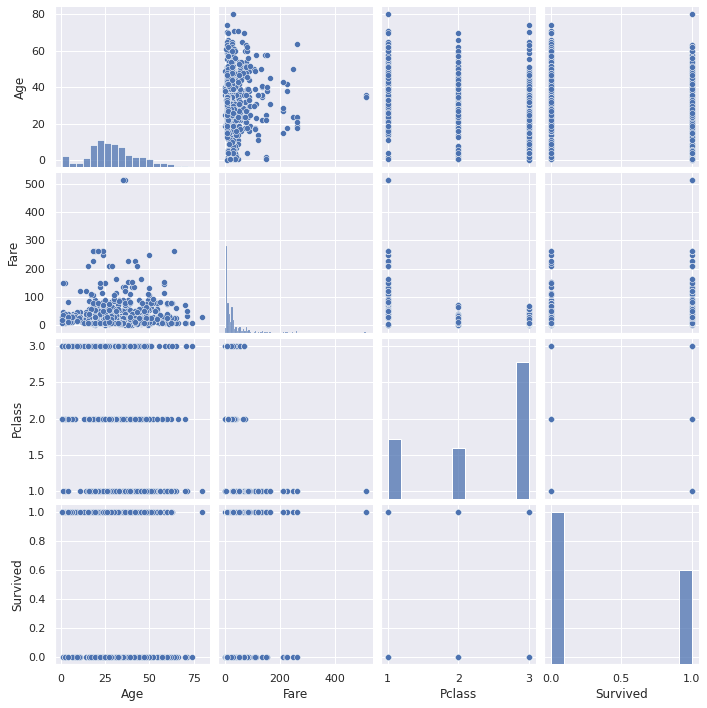

In [14]:
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns; sns.set()
sns.pairplot(train_df)


In [15]:
train_df.corr()# to get the correlation matrix with range from +1 to -1 where +1


,Age,Fare,Pclass,Survived
Age,1.000000,0.096067,-0.369226,-0.077221
Fare,0.096067,1.000000,-0.549500,0.257307
Pclass,-0.369226,-0.549500,1.000000,-0.338481
Survived,-0.077221,0.257307,-0.338481,1.000000


<AxesSubplot:>

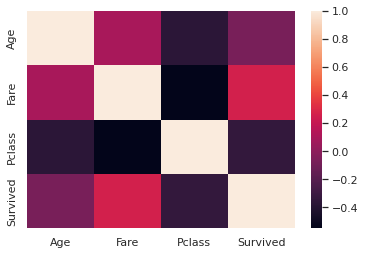

In [16]:

#to plot correlation 
sns.heatmap(train_df.corr())


In [17]:
train_df.groupby('Survived').mean()

,Age,Fare,Pclass
Survived,,,
0,30.626179,22.117887,2.531876
1,28.343690,48.395408,1.950292


Text(0.5, 0, 'AGE')

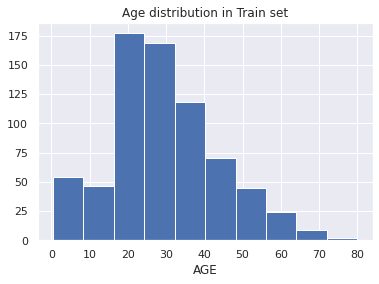

In [18]:
import matplotlib.pyplot as plt
train_df['Age'].hist()
plt.title('Age distribution in Train set')
plt.xlabel('AGE')


Text(0.5, 0, 'AGE')

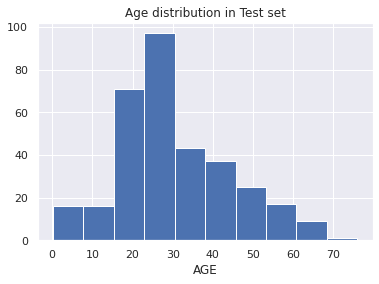

In [19]:
test_df['Age'].hist()
plt.title('Age distribution in Test set')
plt.xlabel('AGE')


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Survived Vs Sex')

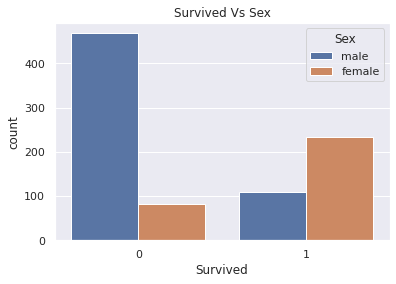

In [20]:
sns.countplot(train_df['Survived'], hue = train_df['Sex'])
plt.title('Survived Vs Sex')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Pclass', ylabel='count'>

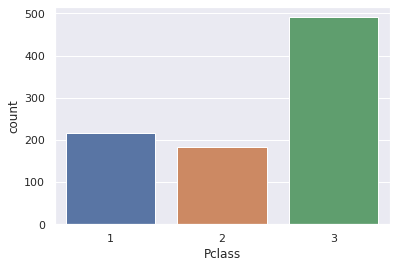

In [21]:
sns.countplot(train_df['Pclass'])

## Model Prediction using MLP (multi layer perceptron) classifier

In [22]:
from sklearn.model_selection import train_test_split #training the mlp model
from sklearn.neural_network import MLPClassifier


In [23]:
x = train_df.drop(columns = ['Survived'])
y = train_df['Survived']

train_df['Sex'] == 'male'
train_df['male'] = train_df['Sex'] == 'male'
x = train_df.drop(columns = ['Sex','Survived'])

x.shape

test_df['Sex']=='male'
test_df['male']= test_df['Sex']=='male'
test_df.drop(columns=['Sex'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,Age,Fare,Pclass,male
0,34.5,7.8292,3,True
1,47.0,7.0000,3,False
2,62.0,9.6875,2,True
3,27.0,8.6625,3,True
4,22.0,12.2875,3,False
...,...,...,...,...
413,NaN,8.0500,3,True
414,39.0,108.9000,1,False
415,38.5,7.2500,3,True
416,NaN,8.0500,3,True


In [24]:
y.shape

(891,)

In [25]:
import numpy as np
x.replace(np.nan,'0', inplace=True)

In [26]:

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split


x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=3)
mlp= MLPClassifier(max_iter=1000, hidden_layer_sizes=(100,50), alpha=0.0001, solver='adam',random_state=3)
mlp.fit(x_train,y_train)
y_pred = mlp.predict(x_test)
mlp.score(x_train,y_train)


0.7859281437125748

In [27]:
# Model Evaluation
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
print('accuracy:', accuracy_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1 score:', f1_score(y_test, y_pred))

accuracy: 0.7443946188340808
precision: 0.6407766990291263
recall: 0.7674418604651163
f1 score: 0.6984126984126984


## Model Prediction using SVM(Support Vector Machine)

In [28]:
import pandas as pd
df1 = pd.read_csv("../input/titanic/train.csv")
df2 = pd.read_csv ("../input/titanic/test.csv")
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
train_df = df1[['Sex','Age','Fare','Pclass','Survived']]
train_df.describe()
x = train_df.drop(columns = ['Survived'])
x.replace({'Sex': {'male':0, 'female':1}}, inplace= True)

In [30]:
test_df = df2[['Sex','Age','Fare','Pclass']]
test_df.describe()


,Age,Fare,Pclass
count,332.000000,417.000000,418.000000
mean,30.272590,35.627188,2.265550
std,14.181209,55.907576,0.841838
min,0.170000,0.000000,1.000000
25%,21.000000,7.895800,1.000000
50%,27.000000,14.454200,3.000000
75%,39.000000,31.500000,3.000000
max,76.000000,512.329200,3.000000


In [31]:
x = train_df.drop(columns = ['Survived'])
x.replace({'Sex': {'male':0, 'female':1}}, inplace= True)
xtrain= x.fillna(0)
xtrain.isna().sum()
xtrain.shape

(891, 4)

In [32]:
ytrain = df1['Survived']
ytrain.shape

(891,)

In [33]:
xtrain

,Sex,Age,Fare,Pclass
0,0,22.0,7.2500,3
1,1,38.0,71.2833,1
2,1,26.0,7.9250,3
3,1,35.0,53.1000,1
4,0,35.0,8.0500,3
...,...,...,...,...
886,0,27.0,13.0000,2
887,1,19.0,30.0000,1
888,1,0.0,23.4500,3
889,0,26.0,30.0000,1


In [34]:
u = test_df
utest = u.fillna(0)
utest.shape


(418, 4)

In [35]:
utest.replace({'Sex': {'male':0, 'female':1}}, inplace= True)
utest

,Sex,Age,Fare,Pclass
0,0,34.5,7.8292,3
1,1,47.0,7.0000,3
2,0,62.0,9.6875,2
3,0,27.0,8.6625,3
4,1,22.0,12.2875,3
...,...,...,...,...
413,0,0.0,8.0500,3
414,1,39.0,108.9000,1
415,0,38.5,7.2500,3
416,0,0.0,8.0500,3


In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import numpy as np
import matplotlib.pyplot as plt
svm_clf = Pipeline((
('scaler', StandardScaler()),
('linear_svc', LinearSVC(C = 1,loss ='hinge'))

))
svm_clf.fit(xtrain,ytrain)
svm_clf.score(xtrain,ytrain)

0.7867564534231201

In [37]:
pred = svm_clf.predict(utest)

pred.shape

(418,)

In [38]:
submit = pd.DataFrame({
        "PassengerId": df2["PassengerId"],
        "Survived": pred
    })
submit.to_csv('submit.csv', header= True, index=False)